
# Clustering individuals as per their demographics

Investors and individuals are subject to many behavioral biases and aren't aware of their "true" risk appetite while making investment decisions.This case study uses the actual data of the investors and identifies the clusters of
investors with similar ability and wilingness to take risk. This clustering technique can be use to assess the "true" risk appetite of the individuals. 

In this jupyter notebook:
* Intuitive meaning of the clusters coming out of the clustering technique.
* Choosing the right clustering techniques 
* Visualisation of the clustering outcome and selecting the right number of clusters in k-means. 

We will look at the following Clustering Techniques:
1. KMeans
2. Affinity Propagation 

## Content

* [1. Introduction](#0)
* [2. Getting Started - Load Libraries and Dataset](#1)
    * [2.1. Load Libraries](#1.1)    
    * [2.2. Load Dataset](#1.2)
* [3. Exploratory Data Analysis](#2)
    * [3.1 Descriptive Statistics](#2.1)    
    * [3.2. Data Visualisation](#2.2)
* [4. Data Preparation](#3)
    * [4.1 Data Cleaning](#3.1)
    * [4.3.Data Transformation](#3.2)  
* [5.Evaluate Algorithms and Models](#5)        
    * [5.1. k-Means Clustering](#5.1)
        * [5.1.1 Finding right number of clusters](#5.1.1)   
    * [5.2. Affinity Propagation Clustering](#5.2)
    * [5.3. Cluster Evaluation](#5.3)
* [6.Cluster Intuition](#6)     
    
    

<a id='0'></a>
# 1. Introduction

The goal of this project is to build a machine learning model to cluster the individuals/investors on the basis of the parameters related to the ability and willing to take risk. The cluster output may be used to understand the type of investors present and also understand assign a risk appetite to a person depending on the different characteristics (i.e. age, wealth, saving and willingness to take risk. 

For this case study the data used is from survey of Consumer Finances which is conducted by the Federal Reserve Board. The survey includes responses to around 19,285 households.Typically the survey is conducted every three years using a different set of households every time. The dataset from "Survey of Consumer Finances" contains the Household's demographics, net worth, financial and non-financial assets for the same demographics in 2007 (pre-crisis) and 2009(post-crisis) and there are 500+ features.

<a id='1'></a>
# 2. Getting Started- Loading the data and python packages

<a id='1.1'></a>
## 2.1. Loading the python packages

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import datetime

#Import Model Packages 
from sklearn.cluster import KMeans, AgglomerativeClustering,AffinityPropagation
from sklearn.metrics import adjusted_mutual_info_score
from sklearn import cluster, covariance, manifold


#Other Helper Packages and functions
import matplotlib.ticker as ticker
from itertools import cycle

<a id='1.2'></a>
## 2.2. Loading the Data

The dataset is same as the dataset used, which is further processed to give the following attributes for different investors for the year 2007.

In [2]:
# load dataset
dataset = pd.read_excel('ProcessedData.xlsx')

In [3]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
type(dataset)

pandas.core.frame.DataFrame

<a id='2'></a>
# 3. Exploratory Data Analysis

<a id='2.1'></a>
## 3.1. Descriptive Statistics

In [5]:
# shape
dataset.shape

(3866, 13)

In [6]:
# peek at data
set_option('display.width', 100)
dataset.head(5)

,ID,AGE,EDUC,MARRIED,KIDS,LIFECL,OCCAT,RISK,HHOUSES,WSAVED,SPENDMOR,NWCAT,INCCL
0,1,3,2,1,0,2,1,3,1,1,5,3,4
1,2,4,4,1,2,5,2,3,0,2,5,5,5
2,3,3,1,1,2,3,2,2,1,2,4,4,4
3,4,3,1,1,2,3,2,2,1,2,4,3,4
4,5,4,3,1,1,5,1,2,1,3,3,5,5


The details of the features is shown in the chart below:

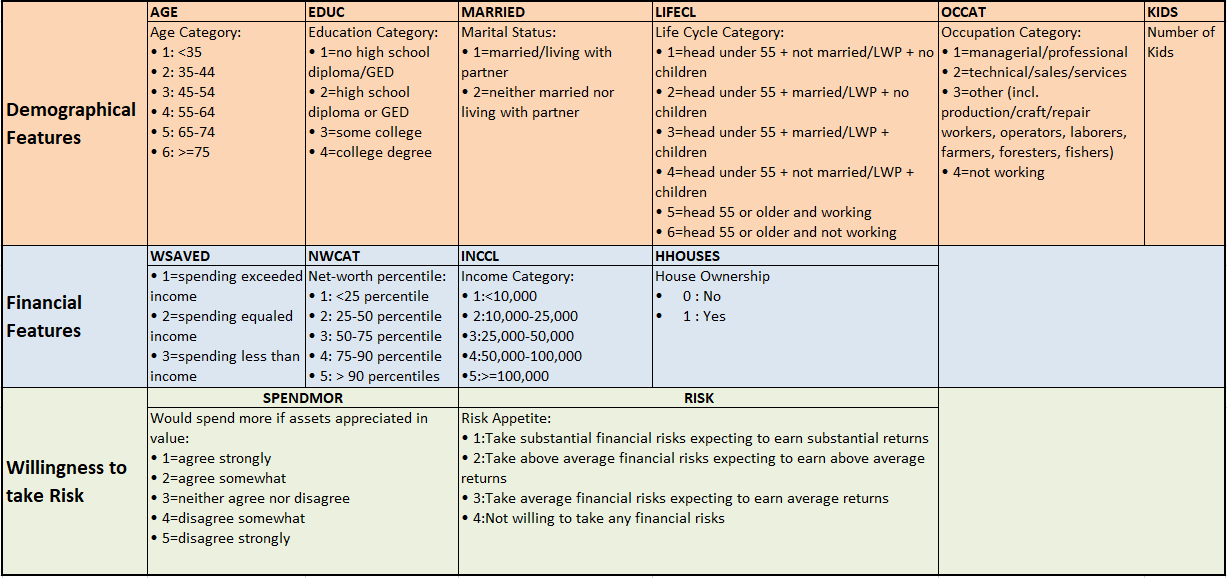

In [7]:
# describe data
set_option('precision', 3)
dataset.describe()

,ID,AGE,EDUC,MARRIED,KIDS,LIFECL,OCCAT,RISK,HHOUSES,WSAVED,SPENDMOR,NWCAT,INCCL
count,3866.000,3866.000,3866.000,3866.000,3866.000,3866.000,3866.000,3866.000,3866.000,3866.000,3866.000,3866.000,3866.000
mean,1933.500,3.107,2.906,1.353,0.938,3.697,1.742,3.043,0.717,2.446,3.561,2.976,3.671
std,1116.162,1.513,1.066,0.478,1.249,1.618,0.934,0.879,0.451,0.743,1.304,1.463,1.184
min,1.000,1.000,1.000,1.000,0.000,1.000,1.000,1.000,0.000,1.000,1.000,1.000,1.000
25%,967.250,2.000,2.000,1.000,0.000,3.000,1.000,2.000,0.000,2.000,2.000,2.000,3.000
50%,1933.500,3.000,3.000,1.000,0.000,3.000,1.000,3.000,1.000,3.000,4.000,3.000,4.000
75%,2899.750,4.000,4.000,2.000,2.000,5.000,3.000,4.000,1.000,3.000,5.000,4.000,5.000
max,3866.000,6.000,4.000,2.000,8.000,6.000,4.000,4.000,1.000,3.000,5.000,5.000,5.000


<a id='2.2'></a>
## 3.2. Data Visualization

Taking a look at the correlation. More detailed look at the data will be performed after implementing the Dimensionality Reduction Models.

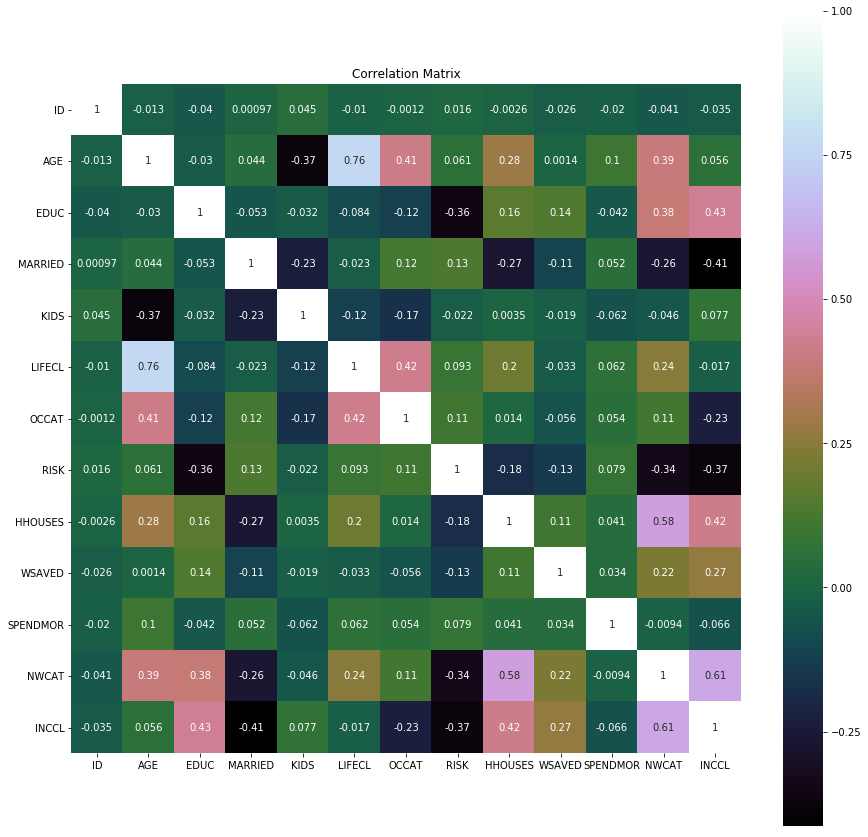

In [8]:
# correlation
correlation = dataset.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

As it can be seen by the picture above there is a significant positive correlation between the stocks. 

<a id='3'></a>
## 4. Data Preparation

<a id='3.1'></a>
## 4.1. Data Cleaning
Check for the NAs in the rows, either drop them or fill them with the mean of the column

In [9]:
#Checking for any null values and removing the null values'''
print('Null Values =',dataset.isnull().values.any())

Null Values = False


Given there isn't any missing data and the data is already in the categorical format no further data cleaning was performed. The ID column which is not needed is dropeed

In [10]:
X=dataset.copy("deep")
X=X.drop(['ID'], axis=1)
X.head()

,AGE,EDUC,MARRIED,KIDS,LIFECL,OCCAT,RISK,HHOUSES,WSAVED,SPENDMOR,NWCAT,INCCL
0,3,2,1,0,2,1,3,1,1,5,3,4
1,4,4,1,2,5,2,3,0,2,5,5,5
2,3,1,1,2,3,2,2,1,2,4,4,4
3,3,1,1,2,3,2,2,1,2,4,3,4
4,4,3,1,1,5,1,2,1,3,3,5,5


<a id='3.2'></a>
## 4.2. Data Transformation

The data available is comprised of attributes with similar scale. Hence no data transformation is required. 

<a id='4'></a>
# 5. Evaluate Algorithms and Models

We will look at the following Models:

1. KMeans
2. Affinity Propagation

<a id='5.1'></a>
## 5.1. K-Means Clustering


In this step we look at the following metrices to get the optimum number of clusters

1. Sum of square errors (SSE) within clusters
2. Silhouette score.

<a id='5.1.1'></a>
### 5.1.1. Finding optimal number of clusters

Typically, two metrics are used to evaluate the number of clusters in K-means model.

1. Sum of square errors (SSE) within clusters
2. Silhouette score


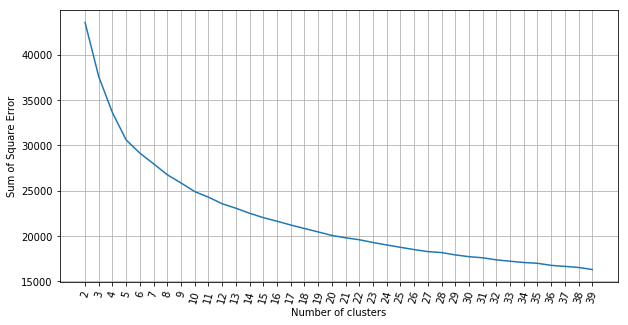

In [13]:
distorsions = []
max_loop=40
for k in range(2, max_loop):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    distorsions.append(k_means.inertia_)
fig = plt.figure(figsize=(10, 5))
plt.plot(range(2, max_loop), distorsions)
plt.xticks([i for i in range(2, max_loop)], rotation=75)
plt.xlabel("Number of clusters")
plt.ylabel("Sum of Square Error")
plt.grid(True)

#### Silhouette score

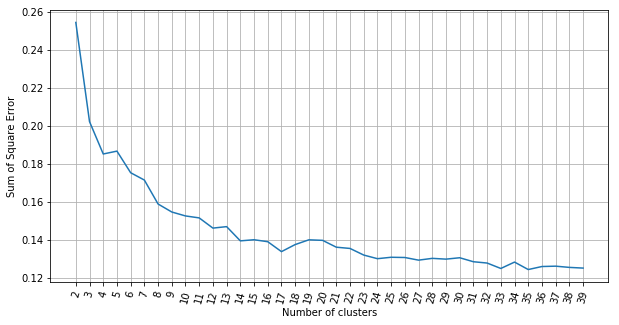

In [14]:
from sklearn import metrics

silhouette_score = []
for k in range(2, max_loop):
        kmeans = KMeans(n_clusters=k,  random_state=10, n_init=10, n_jobs=-1)
        kmeans.fit(X)        
        silhouette_score.append(metrics.silhouette_score(X, kmeans.labels_, random_state=10))
fig = plt.figure(figsize=(10, 5))
plt.plot(range(2, max_loop), silhouette_score)
plt.xticks([i for i in range(2, max_loop)], rotation=75)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.grid(True)

Using both the charts above, the optimum number of clusters seem to be around 7. Within Cluster SSE After K-Means Clustering, we can see that as the number of clusters increase pass 6, the sum of square of errors within clusters plateaus off. From the second graph, Silhouette Score After K-Means Clustering, we can see that there are various parts of the graph where a kink can be seen. Since there is not much a difference in SSE after 8 clusters, we would use 7 clusters in the k-means model below.

<a id='5.1.2'></a>
### 5.1.2. Clustering and Visualisation

In [119]:
nclust=7

In [120]:
#Fit with k-means
k_means = cluster.KMeans(n_clusters=nclust)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [121]:
#Extracting labels 
target_labels = k_means.predict(X)

<a id='5.2'></a>
## 5.2. Affinity Propagation

In [64]:
ap = AffinityPropagation(damping = 0.5, max_iter = 250, affinity = 'euclidean')
ap.fit(X)
clust_labels2 = ap.predict(X)

In [65]:
cluster_centers_indices = ap.cluster_centers_indices_
labels = ap.labels_
n_clusters_ = len(cluster_centers_indices)
print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 161


<a id='5.3'></a>
## 5.3. Cluster Evaluation
If the ground truth labels are not known, evaluation must be performed using the model itself. The Silhouette Coefficient (sklearn.metrics.silhouette_score) is an example of such an evaluation, where a higher Silhouette Coefficient score relates to a model with better defined clusters. The Silhouette Coefficient is defined for each sample and is composed of two scores:

In [122]:
from sklearn import metrics
print("km", metrics.silhouette_score(X, k_means.labels_, metric='euclidean'))
print("ap", metrics.silhouette_score(X, ap.labels_, metric='euclidean'))

km 0.170585217843582
ap 0.09736878398868973


There are 2815 clusters in affinity propagation method as compared to 7 clusters in k-means. k-means has much higher Silhouette Coefficient as compared to the affinity propagation. Hence, k means is preferred as the clustering technique. 

<a id='6'></a>
# 6. Cluster Intuition
In the next step, we will check each cluster and understand the intuition behind the clusters. 

Checking Elements in each cluster 

In [132]:
cluster_output= pd.concat([pd.DataFrame(X), pd.DataFrame(k_means.labels_, columns = ['cluster'])],axis = 1)
output=cluster_output.groupby('cluster').mean()
output

,AGE,EDUC,MARRIED,KIDS,LIFECL,OCCAT,RISK,HHOUSES,WSAVED,SPENDMOR,NWCAT,INCCL
cluster,,,,,,,,,,,,
0,2.355,3.349,1.336,0.169,1.833,1.334,2.683,0.865,2.647,3.745,3.589,4.375
1,4.839,2.158,1.579,0.189,5.621,2.371,3.552,0.709,2.270,3.905,2.362,2.674
2,4.666,3.458,1.226,0.299,5.351,2.077,2.745,0.942,2.624,3.551,4.515,4.506
3,1.874,2.350,1.354,2.124,3.373,1.452,3.416,0.475,2.205,4.426,1.657,3.024
4,2.520,3.610,1.102,2.307,3.147,1.480,2.502,0.952,2.686,3.519,4.294,4.717
5,1.811,2.746,1.649,0.002,1.354,1.627,3.226,0.323,2.367,3.462,1.527,2.744
6,1.983,2.525,1.252,1.971,3.288,1.390,3.225,0.571,2.245,1.874,1.913,3.380


### Demographics Features

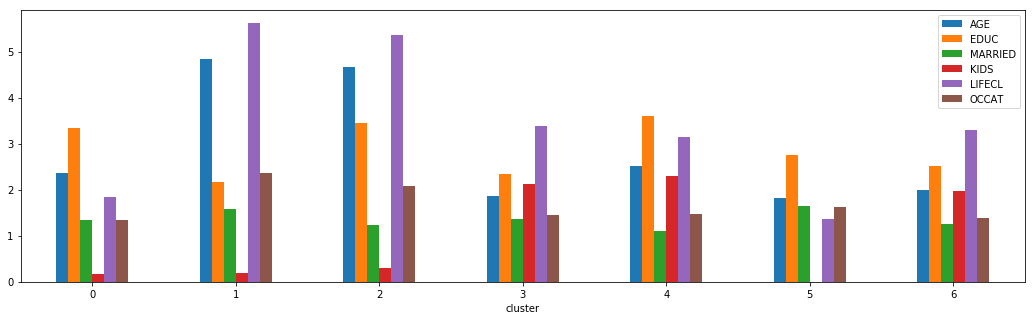

In [133]:
output[['AGE','EDUC','MARRIED','KIDS','LIFECL','OCCAT']].plot.bar(rot=0, figsize=(18,5));

### Financial Features and Features related to willingness to take risk

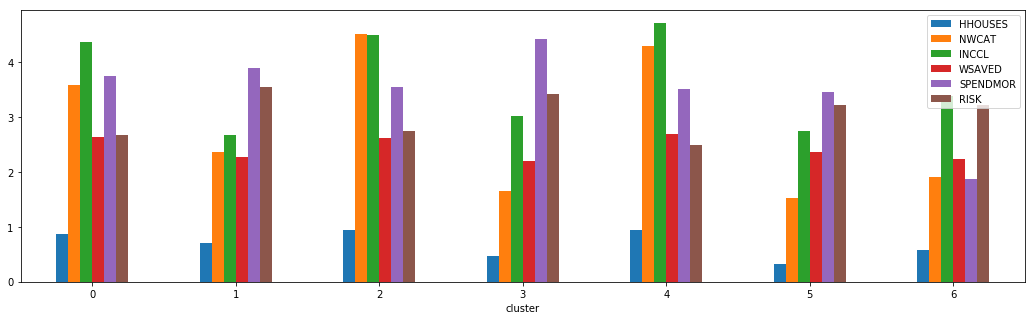

In [134]:
output[['HHOUSES','NWCAT','INCCL','WSAVED','SPENDMOR','RISK']].plot.bar(rot=0, figsize=(18,5));

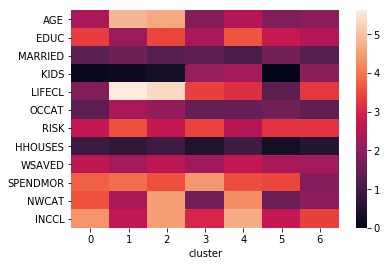

In [135]:
sns.heatmap(output.T)

**Conclusion**

1)  The resulting clusters group people based on their capability to take risk. We look at
the mean values of the variables in each cluster and bar plots to qualitatively understand their makeup.
We can see that there are clear differences in the clusters. The features of the different clusters can be concluded as follows:

| Cluster| Features | Risk Capacity |
| --- | --- | --- |
| Cluster 0	 | Low Age, High Networth and Income, Less risky life category, willingness to spend more | High |
| Cluster 1	 | High Age, low net worth and Income, highly risky life category, Willing ness to take risk, low education | High |
| Cluster 2	 | High Age, high net worth and Income, highly risky life category, Willing ness to to take risk, own house | Medium |
| Cluster 3	 | 	Low age, very low income and net worth, high willingness to take risk, many kids | Low |
| Cluster 4	 | Medium age, very high income and net worth, high willingness to take risk, many kids, own house | High |
| Cluster 5	 | Low age, very low income and net worth, high willingness to take risk, no kids | Medium |
| Cluster 6	 | Low age, medium income and net worth, high willingness to take risk, many kids, own house | Low |

2) We looked at the difference between two clustering techniques, affinity propagation and k-means clustering, and k-means clustering has intuititve number of cluster and also the also better evaluation metrics.

3) This clustering technique can be use to assess the "true" risk appetite of the individuals and decide the right asset allocation for the individuals